<IPython.core.display.Math object>

anal: 2.0943951023931953
val sum *ds: 2.0942065655926894
double trapz: 2.094206565592695


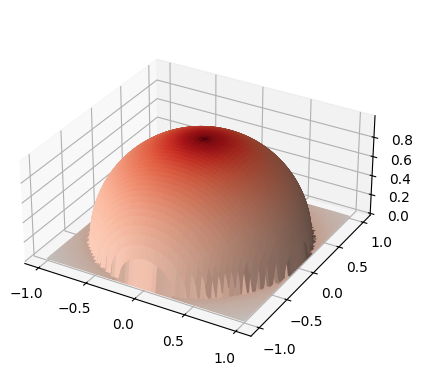

In [1]:
import numpy as np, sympy
from scipy.interpolate import interpn
from sympy.abc import x,y,z, r
from sympy import lambdify
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib as mpl

from IPython.display import Math

rr = 1
zz = sympy.solve(x**2 + y**2 + z**2- r**2 , z, dict=False)[1]
display(Math(r'z(x,y,r)=' + sympy.latex(zz)))

zz_fn = lambdify((x, y, r), zz)

def surf_h(x,y):
    if x*x + y*y > rr*rr:
        return 0.0
    else:
        return zz_fn(x,y,rr)
    
surf_h = np.vectorize(surf_h)

xses = np.linspace(-1,1,150)
yses = np.linspace(-1,1,150)

xyses = np.meshgrid(xses,yses, sparse=True)#, indexing='ij')
zzses = surf_h(*xyses)

fig, ax = plt.subplots(1, subplot_kw={"projection": "3d"})

cmap_r = (xyses[0]**2 + xyses[1]**2)**0.3

norm = matplotlib.colors.Normalize(vmin=cmap_r.min(), vmax=cmap_r.max())
ax.plot_surface(*xyses, zzses, facecolors=mpl.colormaps['Reds_r'](norm(cmap_r)))
ax.set_aspect('equal')

ds = (xses[1]-xses[0])*(yses[1]-yses[0])
print('anal:', 4/3/2*np.pi*rr**3)
print('val sum *ds:', np.sum(zzses)*ds)

xx = xyses[1].flatten()
from scipy.integrate import trapezoid
integrated_x = trapezoid(zzses, x=xx, axis = 0)
yy = xyses[0].flatten()

integrated_y = trapezoid(integrated_x, x=xx)
print('double trapz:', integrated_y)